In [1]:
#Exercise 1a and 1b, matrix multiplication and runtime 
import time
import random
def multiply(matrix_A, matrix_B):
    result = [[0 for _ in range(len(matrix_B[0]))] for _ in range(len(matrix_A))]
    for i in range(len(matrix_A)):
        for j in range(len(matrix_B[0])):
            for k in range(len(matrix_B)):
                result[i][j] += matrix_A[i][k] * matrix_B[k][j]
    return result
    
def generate_matrix(size):
    return [[random.randint(1, 10) for _ in range(size)] for _ in range(size)]
    
matrix_sizes = [1, 100, 500, 1000]  
for size in matrix_sizes:
    matrix_A = generate_matrix(size)
    matrix_B = generate_matrix(size)
    
    start_time = time.perf_counter()
    result = multiply(matrix_A, matrix_B)
    end_time = time.perf_counter()
# I stopped this due to Jupyter crashing with so much data.
  #  if size == 1:
   #     print(f"\n1x1 Matrix A * Matrix B gives us Matrix C:{result}")
   # if size == 100:
   #     print(f"\n100x100 Matrix A * Matrix B gives us Matrix C:{result}")
   # if size == 500:
    #    print(f"\n500x500 Matrix A * Matrix B gives us Matrix C:{result}")
    #if size == 1000:
    #    print(f"\n1000x1000 Matrix A * Matrix B gives us Matrix C:{result}")
    print(f"\nTime taken for {size}x{size} matrix multiplication: {end_time - start_time:.4f} seconds\n")



Time taken for 1x1 matrix multiplication: 0.0000 seconds


Time taken for 100x100 matrix multiplication: 0.4271 seconds


Time taken for 500x500 matrix multiplication: 41.9847 seconds


Time taken for 1000x1000 matrix multiplication: 336.2016 seconds



Time taken for 10x10 matrix multiplication: 0.0007 seconds
Time taken for 50x50 matrix multiplication: 0.0501 seconds
Time taken for 100x100 matrix multiplication: 0.4128 seconds
Time taken for 200x200 matrix multiplication: 2.2741 seconds


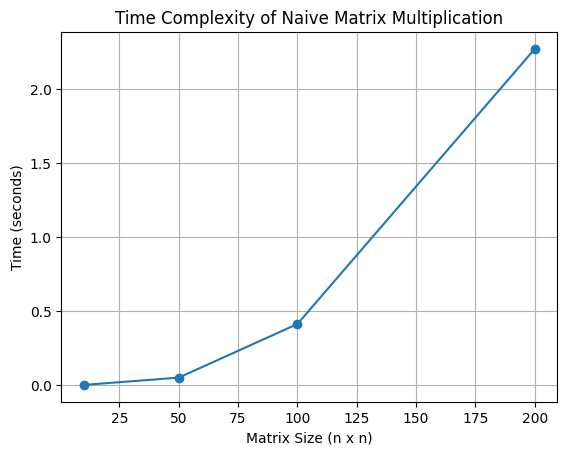

In [2]:
#Exercise 1c, Matrix multiplication with Numpy and algorithmic time complexity
#Plotting time complexity with Naive approach:
import time
import random
import matplotlib.pyplot as plt

def multiply(matrix_A, matrix_B):
    result = [[0 for _ in range(len(matrix_B[0]))] for _ in range(len(matrix_A))]
    for i in range(len(matrix_A)):
        for j in range(len(matrix_B[0])):
            for k in range(len(matrix_B)):
                result[i][j] += matrix_A[i][k] * matrix_B[k][j]
    return result
def generate_matrix(size):
    return [[random.randint(1, 10) for _ in range(size)] for _ in range(size)]
matrix_sizes = [10, 50, 100, 200]  
times = []

for size in matrix_sizes:
    matrix_A = generate_matrix(size)
    matrix_B = generate_matrix(size)
    
    start_time = time.perf_counter()
    multiply(matrix_A, matrix_B)
    end_time = time.perf_counter()
    
    times.append(end_time - start_time)
    print(f"Time taken for {size}x{size} matrix multiplication: {end_time - start_time:.4f} seconds")

# Plotting the time complexity
plt.plot(matrix_sizes, times, marker='o')
plt.title("Time Complexity of Naive Matrix Multiplication")
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Time (seconds)")
plt.grid()
plt.show()


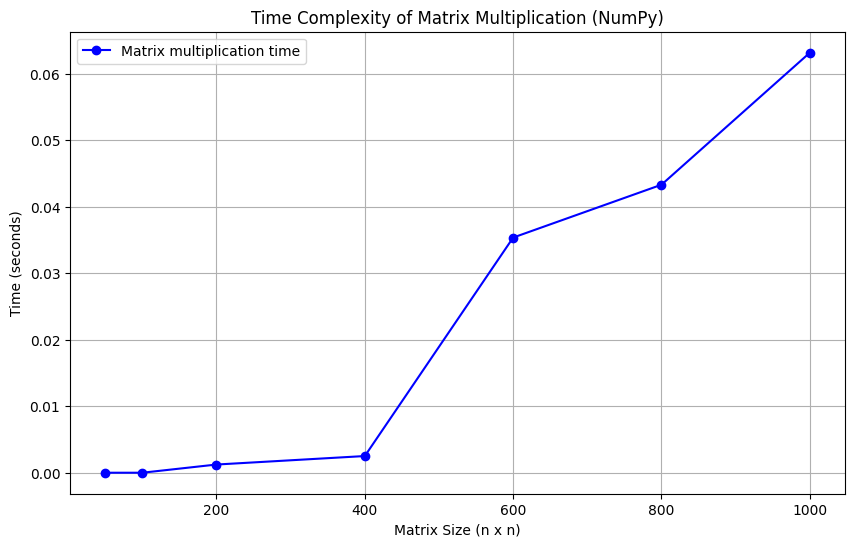

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the range of matrix sizes to test
sizes = [50, 100, 200, 400, 600, 800, 1000]
times = []

# Measure time complexity for matrix multiplication
for size in sizes:
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)
    start_time = time.time()
    np.dot(A, B)  # Perform matrix multiplication
    end_time = time.time()
    times.append(end_time - start_time)

# Plot the time complexity
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', color='b', label='Matrix multiplication time')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Matrix Multiplication (NumPy)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Exercise 1d, Explanation of why the 2 time complexities differ: 
#The time complexities differ as Numpy uses special libraries in Python. 
#With the information stored in these libraries the Numpy approach is significantly faster as seen in the comparison between the 2 tables. 
#The naive approach has a time complexity of O(n^3): where Big O is the notation to measure how fast a function is growing.
#The n^3 comes from the 3 nested loops that are required: one each for rows, then columns and then the summation of the products.

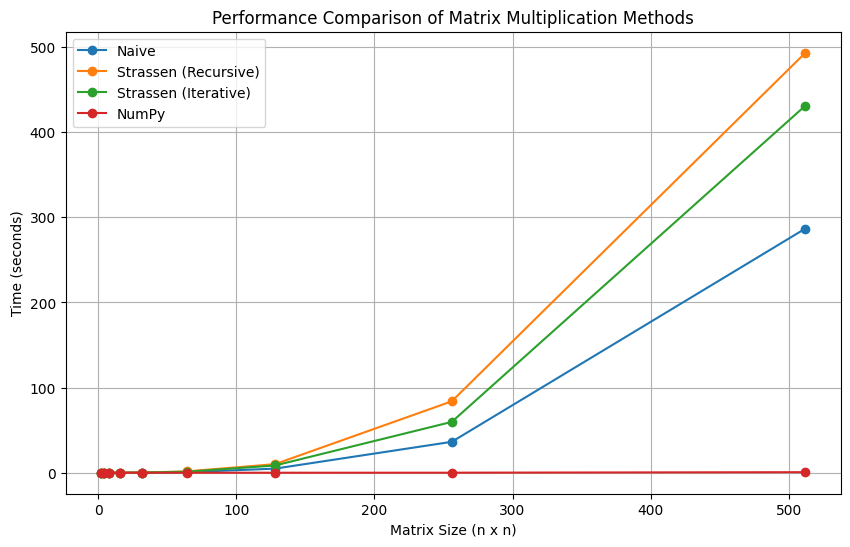

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

def generate_matrix(size):
    """Generates a random square matrix of the given size."""
    return np.random.randint(1, 10, (size, size))

def add_matrices(A, B):
    return A + B

def subtract_matrices(A, B):
    return A - B

def split_matrix(matrix):
    """Splits a given matrix into four quadrants."""
    row, col = matrix.shape
    row2, col2 = row // 2, col // 2
    return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:]

def strassen_recursive(A, B):
    """Recursively multiplies two matrices using Strassen's algorithm."""
    if len(A) == 1:
        return A * B

    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)

    M1 = strassen_recursive(add_matrices(A11, A22), add_matrices(B11, B22))
    M2 = strassen_recursive(add_matrices(A21, A22), B11)
    M3 = strassen_recursive(A11, subtract_matrices(B12, B22))
    M4 = strassen_recursive(A22, subtract_matrices(B21, B11))
    M5 = strassen_recursive(add_matrices(A11, A12), B22)
    M6 = strassen_recursive(subtract_matrices(A21, A11), add_matrices(B11, B12))
    M7 = strassen_recursive(subtract_matrices(A12, A22), add_matrices(B21, B22))

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    top = np.hstack((C11, C12))
    bottom = np.hstack((C21, C22))
    return np.vstack((top, bottom))

def strassen_iterative(A, B):
    n = A.shape[0]
    size = 1
    while size < n:
        size *= 2
    A_pad = np.pad(A, ((0, size - n), (0, size - n)), mode='constant')
    B_pad = np.pad(B, ((0, size - n), (0, size - n)), mode='constant')
    C_pad = np.zeros((size, size))

    def strassen_aux(A, B, C, size):
        if size == 1:
            C[0, 0] = A[0, 0] * B[0, 0]
            return

        half = size // 2
        A11, A12, A21, A22 = A[:half, :half], A[:half, half:], A[half:, :half], A[half:, half:]
        B11, B12, B21, B22 = B[:half, :half], B[:half, half:], B[half:, :half], B[half:, half:]
        C11, C12, C21, C22 = C[:half, :half], C[:half, half:], C[half:, :half], C[half:, half:]

        M1 = np.zeros((half, half))
        M2 = np.zeros((half, half))
        M3 = np.zeros((half, half))
        M4 = np.zeros((half, half))
        M5 = np.zeros((half, half))
        M6 = np.zeros((half, half))
        M7 = np.zeros((half, half))

        strassen_aux(A11 + A22, B11 + B22, M1, half)
        strassen_aux(A21 + A22, B11, M2, half)
        strassen_aux(A11, B12 - B22, M3, half)
        strassen_aux(A22, B21 - B11, M4, half)
        strassen_aux(A11 + A12, B22, M5, half)
        strassen_aux(A21 - A11, B11 + B12, M6, half)
        strassen_aux(A12 - A22, B21 + B22, M7, half)

        C11[:], C12[:], C21[:], C22[:] = M1 + M4 - M5 + M7, M3 + M5, M2 + M4, M1 - M2 + M3 + M6

    strassen_aux(A_pad, B_pad, C_pad, size)
    return C_pad[:n, :n]

def naive_matrix_multiplication(A, B):
    n = len(A)
    C = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

# Testing and plotting
sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512]
naive_times = []
strassen_recursive_times = []
strassen_iterative_times = []
numpy_times = []

for size in sizes:
    A = generate_matrix(size)
    B = generate_matrix(size)
    
    start = time.time()
    naive_matrix_multiplication(A, B)
    naive_times.append(time.time() - start)
    
    start = time.time()
    strassen_recursive(A, B)
    strassen_recursive_times.append(time.time() - start)
    
    start = time.time()
    strassen_iterative(A, B)
    strassen_iterative_times.append(time.time() - start)
    
    start = time.time()
    np.dot(A, B)
    numpy_times.append(time.time() - start)

plt.figure(figsize=(10, 6))
plt.plot(sizes, naive_times, label="Naive", marker='o')
plt.plot(sizes, strassen_recursive_times, label="Strassen (Recursive)", marker='o')
plt.plot(sizes, strassen_iterative_times, label="Strassen (Iterative)", marker='o')
plt.plot(sizes, numpy_times, label="NumPy", marker='o')

plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison of Matrix Multiplication Methods")
plt.legend()
plt.grid(True)
plt.show()
